Data from UCI machine learning repository.
Goal is to predict quality of wine based on physicochemical tests

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt
os.chdir('C:\\Users\\Dinesh\\Desktop')

In [2]:
wine_ds = pd.read_csv('winequality-white.csv',sep=";")

In [3]:
wine_ds.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
wine_ds.quality.unique(

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

Look at the distributions of data and see if feature scaling or normalization or anyother pre-requisite is required

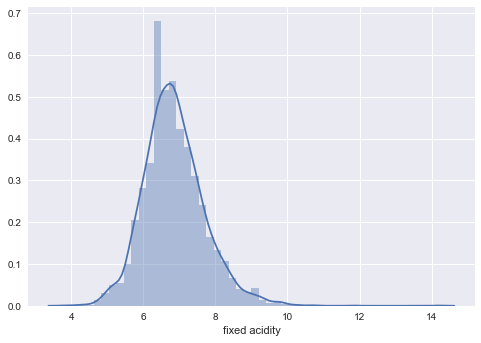

In [197]:
sns.distplot(wine_ds['fixed acidity'])
plt.show()

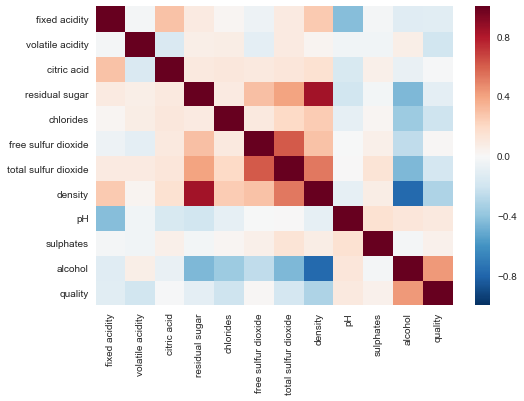

In [198]:
#understanding correlation
sns.heatmap(wine_ds.corr())
plt.show()
#print wine_ds.corr()

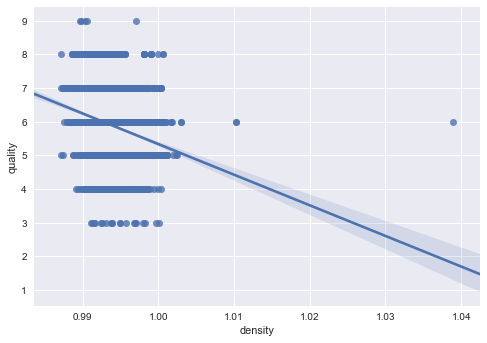

In [199]:
#looking at linear relationship within variables
sns.regplot(x='density',y='quality',data=wine_ds)
plt.show()

PREPROCESSING on X_train only:-
For instance, many elements used in the objective function of a learning algorithm
(such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) 
assume that all features are centered around zero and have variance in the same order. 
If a feature has a variance that is orders of magnitude larger than others, 
it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [200]:
#multicollinearity.. heavily correlated with 'density'
y = wine_ds['quality'].as_matrix()
X = wine_ds.drop('quality', axis = 1).as_matrix()

#since 4 varaibles have values between 0 and 1, scale down rest also to 0 and 1
scaler = preprocessing.MinMaxScaler()
print scaler.fit(X)
X = scaler.transform(X)

MinMaxScaler(copy=True, feature_range=(0, 1))


split x and y
and
train and test

In [201]:
#split to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train

array([[ 0.26923077,  0.16666667,  0.18072289, ...,  0.27272727,
         0.3255814 ,  0.17741935],
       [ 0.38461538,  0.17647059,  0.29518072, ...,  0.28181818,
         0.11627907,  0.53225806],
       [ 0.24038462,  0.14705882,  0.19879518, ...,  0.54545455,
         0.23255814,  0.51612903],
       ..., 
       [ 0.36538462,  0.18627451,  0.31325301, ...,  0.27272727,
         0.36046512,  0.5483871 ],
       [ 0.24038462,  0.15686275,  0.1746988 , ...,  0.40909091,
         0.18604651,  0.41935484],
       [ 0.41346154,  0.18627451,  0.21084337, ...,  0.45454545,
         0.47674419,  0.38709677]])

Ordinary Least quares

In [204]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_predicted = reg.predict(X_test)

residuals = reg.residues_
mae = metrics.mean_absolute_error(y_true= y_test, y_pred = y_predicted)
mse = metrics.mean_squared_error(y_true = y_test, y_pred = y_predicted)
rmse = np.sqrt(mse)
r_squared = metrics.r2_score(y_true = y_test, y_pred = y_predicted)

print "Mean absolute error (sum of the absolute differences between predictions and actual values): ",mae
print "Mean Squared error (avg of squares of deviation - how close is fitted line to data points)", mse
print "RMSE (avg magnitude of error) : ", rmse
#Adding more and more independent variables will increase the r2 regardless of correlation
#thats why use adjusted r2. if new independent variable is added, adj r2 will increase if correlation exists else decrease
print "R-Squared (coeff of determination): ", r_squared
print "Residuals:  ", residuals

Mean absolute error (sum of the absolute differences between predictions and actual values):  0.577723565692
Mean Squared error (avg of squares of deviation - how close is fitted line to data points) 0.554292733014
RMSE (avg magnitude of error) :  0.744508383441
R-Squared (coeff of determination):  0.265868713248
Residuals:   1947.7956915


C:\Users\Dinesh\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


Ridge regression

In [208]:
ridge_reg = linear_model.Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)
y_predicted = ridge_reg.predict(X_test)
r_squared = metrics.r2_score(y_true = y_test, y_pred = y_predicted)
print r_squared

0.26040574767
